In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [250]:
# sin波からサンプリング
n = 100
X = np.linspace(0, 2 * np.pi, num=n)
y = np.sin(X) + np.random.normal(0, 0.3, n)

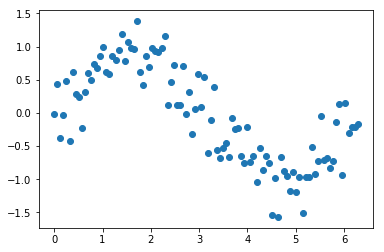

In [251]:
plt.scatter(X,y)

In [253]:
X = X.reshape(-1,1) # sk-leranの都合上、変形

In [255]:
class RBFNet:
    def __init__(self, sigma, alpha):
        self.alpha = alpha #  リッジ回帰のペナルティ係数
        self.sigma = sigma #  RBFカーネルの半径
        
    def kernel(self, X):
        d = X - self.mu.T
        h = np.exp(-(d**2)/(2*self.sigma))
        return h
    
    def fit(self, X_train, y_train):
        self.mu = X_train #   学習データの記憶。ここでは単純に、学習データをRBFカーネルの中心とする
        h = self.kernel(X_train)
        self.ridge = Ridge(self.alpha).fit(h, y_train) #   一旦カーネルの計算を終えてしまえば、あとはただの線形（リッジ）回帰
        
    def predict(self,X):
        h = self.kernel(X)
        return self.ridge.predict(h)

In [263]:
grid = np.linspace(0, 2 * np.pi, num=10000) #  numを大きくするとsin関数、RBF近似を正確に描画できる
grid = grid.reshape(-1,1)

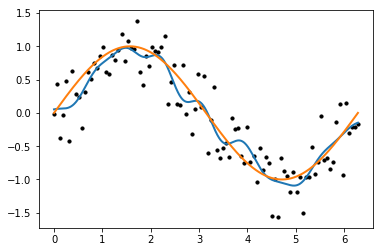

In [265]:
rbf = RBFNet(sigma=0.1, alpha=0.1)
rbf.fit(X,y)
preds = rbf.predict(grid)

plt.scatter(X,y,s=10,c='black')
plt.plot(grid,preds,lw=2) # blue
plt.plot(grid,np.sin(grid),lw=2) # red

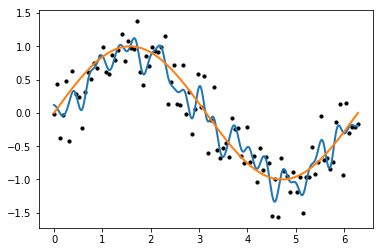

In [266]:
rbf = RBFNet(sigma=0.01, alpha=0.1)
rbf.fit(X,y)
preds = rbf.predict(grid)

plt.scatter(X,y,s=10,c='black')
plt.plot(grid,preds,lw=2) # blue
plt.plot(grid,np.sin(grid),lw=2) # red

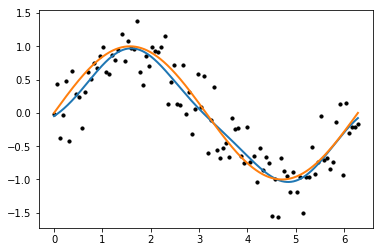

In [267]:
rbf = RBFNet(sigma=1, alpha=0.1)
rbf.fit(X,y)
preds = rbf.predict(grid)

plt.scatter(X,y,s=10,c='black')
plt.plot(grid,preds,lw=2) # blue
plt.plot(grid,np.sin(grid),lw=2) # red

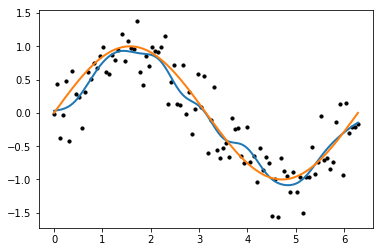

In [268]:
rbf = RBFNet(sigma=0.1, alpha=1)
rbf.fit(X,y)
preds = rbf.predict(grid)

plt.scatter(X,y,s=10,c='black')
plt.plot(grid,preds,lw=2) # blue
plt.plot(grid,np.sin(grid),lw=2) # red

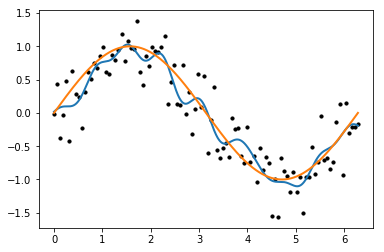

In [269]:
rbf = RBFNet(sigma=0.1, alpha=0.01)
rbf.fit(X,y)
preds = rbf.predict(grid)

plt.scatter(X,y,s=10,c='black')
plt.plot(grid,preds,lw=2) # blue
plt.plot(grid,np.sin(grid),lw=2) # red